In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print('[INFO] accessing MNIST...')
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [4]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [5]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

e:\Códigos\Python-Codigo-Faculdade\Tópicos de BigData em Python\sala_de_aula\Tema 6\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1312 - loss: 2.3305 - val_accuracy: 0.2707 - val_loss: 2.2458
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3102 - loss: 2.2310 - val_accuracy: 0.4171 - val_loss: 2.1742
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4457 - loss: 2.1548 - val_accuracy: 0.5590 - val_loss: 2.0735
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5555 - loss: 2.0461 - val_accuracy: 0.5778 - val_loss: 1.9253
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6094 - loss: 1.8872 - val_accuracy: 0.6370 - val_loss: 1.7268
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6375 - loss: 1.6812 - val_accuracy: 0.6693 - val_loss: 1.5060
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6756 - loss: 1.4636 - val_accuracy: 0.7084 - val_loss: 1.3053
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7122 - loss: 1.2713 - val_accu

In [7]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
     predictions.argmax(axis=1),
     target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.90      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



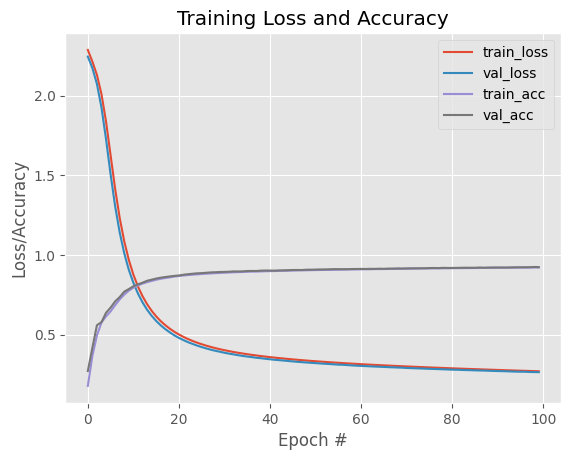

In [8]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()